To do list
1. plot d(i,j) versus d(i,j) in molpc(different for homomer and heteramer)
2. try to find path from the protein contact map(find maximum then elininate those pairs)


ABC
ABD
ABE

In [1]:
import Bio.PDB
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['agg.path.chunksize'] = 10000

In [21]:
def cal_dist(r1, r2):
        # r1 means residue 1, r2 means residue 2
        return r1["CA"] - r2["CA"]


# convert new_structure from list to empty dictionary
def clean_pdb(structure):
    new_structure = {}

    for chain in structure[0]:
        new_chain = []
        for r in chain:
            if r.id[0] == " ":
                new_chain.append(r)

        new_structure[chain.get_id()] = new_chain
    return new_structure
    
def contact_map_btw(chainA, chainB):
    contact_map = np.zeros((1,len(chainB)))
    
    for r_A in chainA:
        dists = []
        for r_B in chainB:
            dists.append(r_A["CA"] - r_B["CA"])
        contact_map = np.vstack([contact_map, dists])
    return np.delete(contact_map, 0, 0)

def contact_map_total(structure):
    #borderline = 10
    total_res = 0
    num_chain = 0
    
    structure = clean_pdb(structure)
    
    for chain in structure:
        total_res += len(chain)
        num_chain += 1
    
    contact_map = np.zeros((1, total_res+num_chain*10+1))
    for chainA in structure:
        contact_map_row = np.zeros((len(chainA), 1))
        for chainB in structure:
            contact_map_sub = contact_map_btw(chainA, chainB)
            contact_map_row = np.hstack([contact_map_row, contact_map_sub])
            contact_map_row = np.hstack([contact_map_row, np.zeros((len(chainA), 10))])
        #contact_map_row = np.delete(contact_map_row, 0, 0)
        contact_map = np.vstack([contact_map, contact_map_row])
        contact_map = np.vstack([contact_map, np.zeros((10, total_res+num_chain*10+1))])
    return contact_map

def contact_map_total_raw(structure, chain_lst):
    #borderline = 10
    total_res = 0
    num_chain = 0
    
    structure = clean_pdb(structure)
    
    for chain in structure:
        total_res += len(structure[chain])
        num_chain += 1

    contact_map = np.zeros((1, total_res+1))
    for chainA_id in chain_lst:
        chainA = structure[chainA_id]
        contact_map_row = np.zeros((len(chainA), 1))
        for chainB_id in chain_lst:
            chainB = structure[chainB_id]
            contact_map_sub = contact_map_btw(chainA, chainB)
            contact_map_row = np.hstack([contact_map_row, contact_map_sub])
        contact_map = np.vstack([contact_map, contact_map_row])
    return np.delete(np.delete(contact_map, 0, 0),0,1)

def dist_comp(stru1, lst1, stru2, lst2):
    # stru1 should be the experimental structure
    # stru2 should be your model
    if len(lst1)>len(lst2):
        lst1 = lst1[:len(lst2)]
    elif len(lst2)>len(lst1):
        lst2 = lst2[:len(lst1)]

    contact_map1 = contact_map_total_raw(stru1, lst1)
    contact_map2 = contact_map_total_raw(stru2, lst2)

    plt.rcParams['figure.figsize'] = [7, 7]

    plt.plot(contact_map1.flatten(), contact_map2.flatten(), ',')
    plt.xlabel("experimental")
    plt.ylabel("model")

    return None
    

def contact_map_plot(contact_map):
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(contact_map, cmap='hot', interpolation='nearest')
    axs[0].invert_yaxis()
    axs[1].hist(contact_map)
    plt.show()

## Protein complex contact map

### 2BL2_MoLPC

In [4]:
parser = Bio.PDB.PDBParser()
#structure = parser.get_structure("2BL2_MoLPC", "2BL2_MoLPC.pdb")
structure = parser.get_structure("1BCF", "2BL2_MoLPC.pdb")

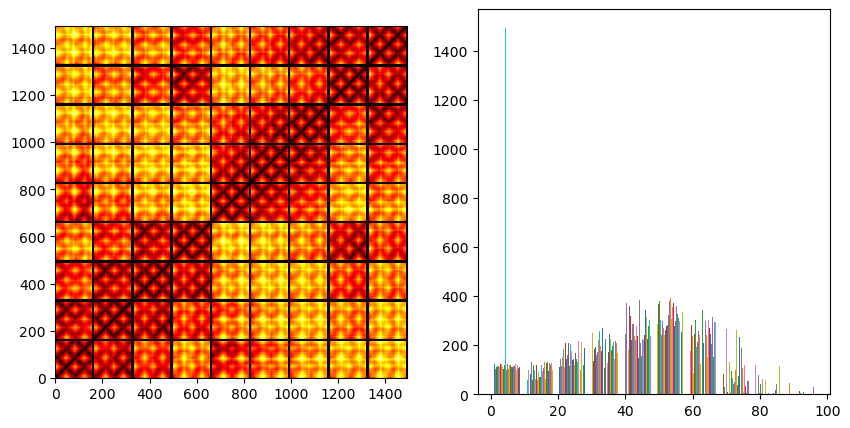

In [8]:
contact_map = contact_map_total(structure)
contact_map_plot(contact_map)

### 2BL2 experimental

In [133]:
parser = Bio.PDB.PDBParser()
structure = parser.get_structure("2BL2_IMP", "2BL2_IMP.pdb")

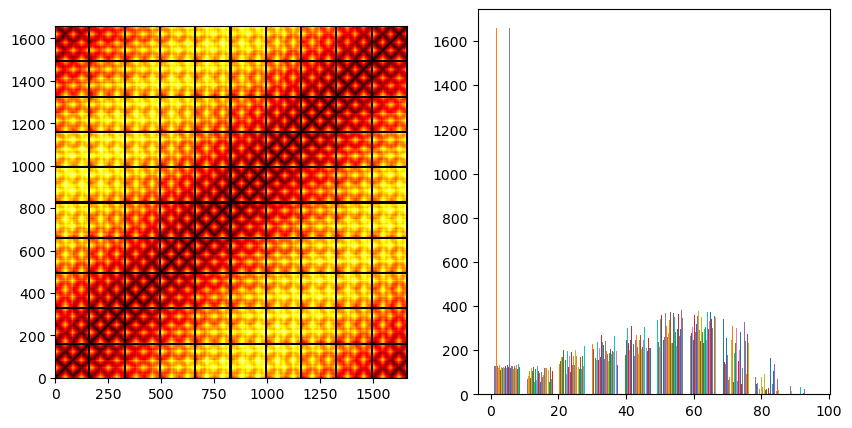

In [134]:
contact_map = contact_map_total(structure)
contact_map_plot(contact_map)

### Di,j vs Di,j

Name of Structure_1: 2BL2_MoLPC.pdb:F:C:H:J:I:D:G:E:A: (to be superimposed onto Structure_2)

Name of Structure_2: 2bl2.pdb:I:H:G:F:A:B:C:E:D:J

In [19]:
with open('1H2I.txt') as f:
    lines = f.readlines()

lst1 = lines[1].split("\t")[0].split(":")[1:]
lst2 = lines[1].split("\t")[1].split(":")[1:]

In [20]:
lst1
lst2

['I',
 'K',
 'E',
 'J',
 'C',
 'B',
 'D',
 'G',
 'A',
 'H',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'F']

In [21]:
lst2 = [x for x in lst2 if x]
lst2

['I', 'K', 'E', 'J', 'C', 'B', 'D', 'G', 'A', 'H', 'F']

In [59]:
parser = Bio.PDB.PDBParser()
structure1 = parser.get_structure("experimental", "1H2I.pdb")
structure2 = parser.get_structure("molpc", "molpc_1H2I.pdb")
structure3 = parser.get_structure("experimental", "1h2i.pdb")
structure4 = parser.get_structure("experimental", "3HHW.pdb")

/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33953.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33976.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33998.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34019.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34043.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureB

In [47]:
parser = Bio.PDB.MMCIFParser()
structure_mmcif = parser.get_structure("experimental", "1h2i.cif")

/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32318.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32341.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32363.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32384.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32408.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureB

In [44]:
for chain in structure3[0]:
    print(len(chain))

209
208
207
210
208
211
204
208
208
206
209
207
209
212
203
210
207
208
208
208
209
207


In [116]:
imp_chain_lst =   ["A","B","C","D","E","F","G","H","I","J"]
exper_chain_lst = ["C","E","D","F","G","H","I","J","A","B"]
molpc_chain_lst = ["F","C","H","J","I","D","G","E","A"]


exper_chain_lst[0:len(molpc_chain_lst)]

['C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'A']

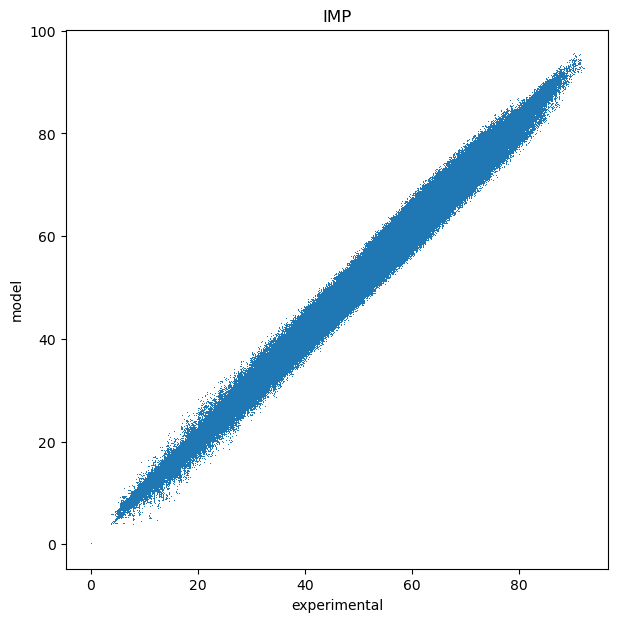

In [89]:


plt.title("IMP")
dist_comp(structure2, exper_chain_lst, structure3, imp_chain_lst)

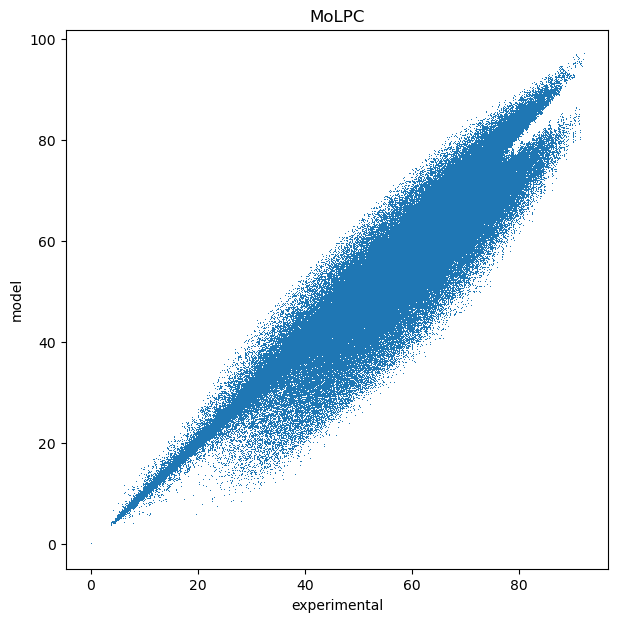

In [90]:
molpc_chain_lst = ["F","C","H","J","I","D","G","E","A"]
exper_chain_lst = ["I","H","G","F","A","B","C","E","D","J"]

plt.title("MoLPC")
dist_comp(structure2, exper_chain_lst, structure1, molpc_chain_lst)

In [22]:
parser = Bio.PDB.PDBParser()
structure1 = parser.get_structure("experimental", "data/1IJG.pdb")
structure2 = parser.get_structure("model", "data/1IJG_imp_fixed.pdb")

/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26855.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26923.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 26978.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27034.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27101.
  warnings.warn(
/home/hychimaa/anaconda3/envs/IMP/lib/python3.8/site-packages/Bio/PDB/StructureB

In [30]:
def clean_pdb_fixed(structure):
    new_structure = {}

    for chain in structure[0]:
        new_chain = []
        for r in chain:
            if r.id[2] == " ":
                new_chain.append(r)

        new_structure[chain.get_id()] = new_chain
    return new_structure

In [31]:
test2 = clean_pdb_fixed(structure2)

In [32]:
len(test2["A"])

257

In [24]:
test = clean_pdb(structure1)

In [25]:
len(test["A"])

257

In [10]:
for r in structure2[0]['A']:
    print(r.id)

(' ', 9000, 'X')
(' ', 9001, 'X')
(' ', 9002, 'X')
(' ', 9003, 'X')
(' ', 9004, 'X')
(' ', 9005, 'X')
(' ', 9006, 'X')
(' ', 9007, 'X')
(' ', 9008, 'X')
(' ', 9009, 'X')
(' ', 11, ' ')
(' ', 12, ' ')
(' ', 13, ' ')
(' ', 14, ' ')
(' ', 15, ' ')
(' ', 16, ' ')
(' ', 17, ' ')
(' ', 18, ' ')
(' ', 19, ' ')
(' ', 20, ' ')
(' ', 21, ' ')
(' ', 22, ' ')
(' ', 23, ' ')
(' ', 24, ' ')
(' ', 25, ' ')
(' ', 26, ' ')
(' ', 27, ' ')
(' ', 28, ' ')
(' ', 29, ' ')
(' ', 30, ' ')
(' ', 31, ' ')
(' ', 32, ' ')
(' ', 33, ' ')
(' ', 34, ' ')
(' ', 35, ' ')
(' ', 36, ' ')
(' ', 37, ' ')
(' ', 38, ' ')
(' ', 39, ' ')
(' ', 40, ' ')
(' ', 41, ' ')
(' ', 42, ' ')
(' ', 43, ' ')
(' ', 44, ' ')
(' ', 45, ' ')
(' ', 46, ' ')
(' ', 47, ' ')
(' ', 48, ' ')
(' ', 49, ' ')
(' ', 50, ' ')
(' ', 51, ' ')
(' ', 52, ' ')
(' ', 53, ' ')
(' ', 54, ' ')
(' ', 55, ' ')
(' ', 56, ' ')
(' ', 57, ' ')
(' ', 58, ' ')
(' ', 59, ' ')
(' ', 60, ' ')
(' ', 61, ' ')
(' ', 62, ' ')
(' ', 63, ' ')
(' ', 64, ' ')
(' ', 65, ' ')
(' ',